In [1]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
from konlpy.tag import Okt  
okt = Okt() 
import tensorflow as tf
import numpy as np
from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt


import urllib.request
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import matplotlib.pyplot as plt 
from string import punctuation
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
import matplotlib.font_manager as fm

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지

In [4]:
playlist = pd.read_csv('./z_save/total_playlist.csv')

## 전처리

In [5]:
playlist['Lyric'] = playlist['Lyric'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
playlist[:5]
playlist['Lyric'] = playlist['Lyric'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
playlist['Lyric'].replace('', np.nan, inplace=True)
print(playlist.isnull().sum())
playlist = playlist.dropna(how = 'any')
playlist.reset_index(drop=True)
print('전처리 후 데이터의 개수 :',len(playlist))

song_id          0
song_name        0
artist           0
album            1
Like_Count       9
Lyric         1122
cover_url       21
tags            21
dtype: int64
전처리 후 데이터의 개수 : 26793


In [6]:
playlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26793 entries, 0 to 27926
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   song_id     26793 non-null  int64 
 1   song_name   26793 non-null  object
 2   artist      26793 non-null  object
 3   album       26793 non-null  object
 4   Like_Count  26793 non-null  object
 5   Lyric       26793 non-null  object
 6   cover_url   26793 non-null  object
 7   tags        26793 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.8+ MB


In [8]:
playlist['tags'].nunique()

1130

In [53]:
spring = playlist[playlist['tags'].str.contains('봄')]
spring_count = len(spring)
print(spring_count)

1975


In [52]:
summer = playlist[playlist['tags'].str.contains('여름')]
summer_count = len(summer)
print(summer_count)

2200


In [50]:
fall = playlist[playlist['tags'].str.contains('가을')]
fall_count = len(fall)
print(fall_count)

3069


In [49]:
winter = playlist[playlist['tags'].str.contains('겨울')]
winter_count = len(winter)
print(winter_count)

2598


In [51]:
fall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3069 entries, 198 to 26847
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   song_id     3069 non-null   int64 
 1   song_name   3069 non-null   object
 2   artist      3069 non-null   object
 3   album       3069 non-null   object
 4   Like_Count  3069 non-null   object
 5   Lyric       3069 non-null   object
 6   cover_url   3069 non-null   object
 7   tags        3069 non-null   object
dtypes: int64(1), object(7)
memory usage: 215.8+ KB


In [54]:
seasons = [spring_count,summer_count,fall_count,winter_count]

In [55]:
seasons

[1975, 2200, 3069, 2598]

In [36]:
import matplotlib.pyplot as plt

In [45]:
seasons_name = ['봄', '여름', '가을', '겨울']

Text(0.5, 1.0, '노래의 계절 분포 수')

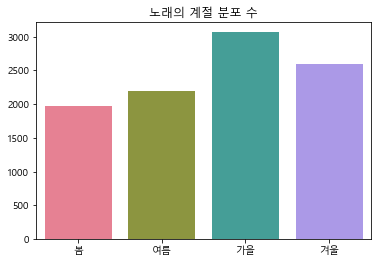

In [56]:
sns.barplot(seasons_name, seasons, palette='husl')
plt.title('노래의 계절 분포 수')

In [57]:
b = playlist[playlist['tags'].str.contains('발라드')]
b_count = len(b)
print(b_count)

6615


In [58]:
e = playlist[playlist['tags'].str.contains('신나는')]
e_count = len(e)
print(e_count)

2380


In [59]:
a = playlist[playlist['tags'].str.contains('어쿠스틱')]
a_count = len(a)
print(a_count)

1015


In [60]:
i = playlist[playlist['tags'].str.contains('인디')]
i_count = len(i)
print(i_count)

9450


In [77]:
ele = playlist[playlist['tags'].str.contains('일렉트로')]
ele_count = len(ele)
print(ele_count)

729


In [78]:
drama = playlist[playlist['tags'].str.contains('드라마')]
drama_count = len(drama)
print(drama_count)

371


In [79]:
dance = playlist[playlist['tags'].str.contains('댄스')]
dance_count = len(dance)
print(dance_count)

730


In [80]:
rnb = playlist[playlist['tags'].str.contains('알앤비')]
rnb_count = len(rnb)
print(rnb_count)

1984


In [95]:
tt = playlist[playlist['tags'].str.contains('트로트')]
tt_count = len(tt)
print(tt_count)

25


In [96]:
h = playlist[playlist['tags'].str.contains('힙합')]
h_count = len(h)
print(h_count)

2041


In [98]:
dist = pd.DataFrame({'힙합':[2041],'일렉트로닉':[729],'드라마':[371],'댄스':[730],'발라드':[6615], '알앤비':[1984],'어쿠스틱':[1015],'인디':[9450]},index=['count']).T




In [65]:
colors = ['#8fd9b6','#ff9999','#ffc000','#c2c2f0']

In [109]:
colors = [ '#ff9999','#ffc000','#fef98b','#e7ffba',
          '#baffd3','#bae7ff','#f5baff','#c2c2f0']


In [83]:
wedgeprops={'width': 0.75, 'edgecolor': 'w', 'linewidth': 5}

Text(0.5, 1.0, 'genre')

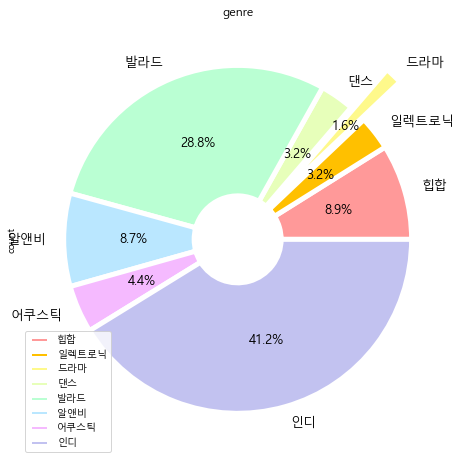

In [110]:
plot = dist.plot.pie(y='count',figsize=(8,8),fontsize=13, explode = (0,0,0.3,0,0,0,0,0),autopct='%1.1f%%',colors=colors,wedgeprops=wedgeprops)
plt.legend(loc=3) # lower left
plt.title('genre')